In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


<Axes: >

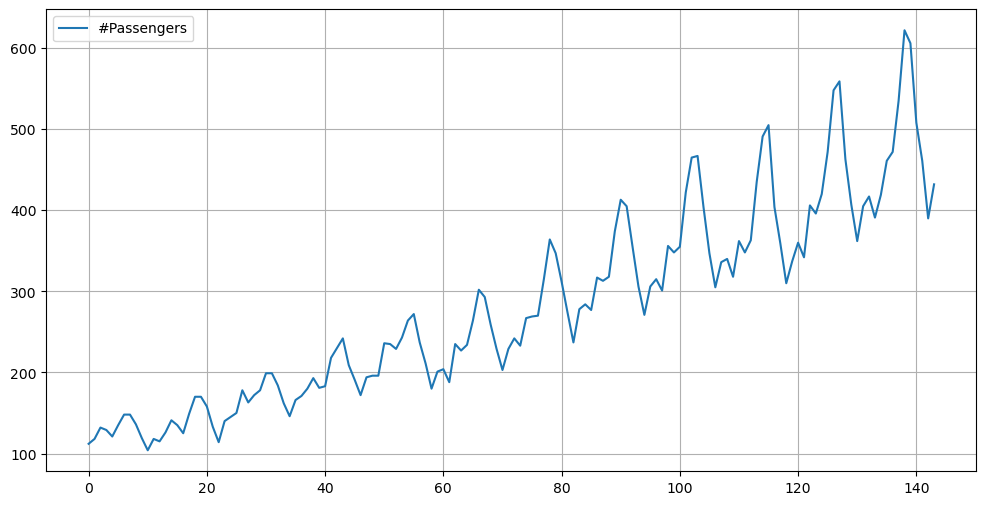

In [5]:
df.plot(figsize=(12,6),grid=True)

In [6]:
y = df['#Passengers'].values

In [7]:
len(y)

144

In [8]:
test_size = 12
train_size = len(y) - test_size

In [9]:
train_set = y[:train_size]
test_set = y[train_size:]

In [10]:
test_set

array([417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432])

In [11]:
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler()
train_norm = sclr.fit_transform(train_set.reshape(-1,1))

In [12]:
train_norm = torch.Tensor(train_norm).view(-1)

In [13]:
def input_data(seq,ws):
    L = len(seq)
    out = []
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [14]:
window_size = 12
train_data = input_data(train_norm,window_size)

In [15]:
class LSTM(nn.Module):
    
    def __init__(self,input_size=1,hidden_size = 32,out_size =1,bidirectional= True):
        super(LSTM,self).__init__()
        self.hidden_size = hidden_size
        self.num_dir = 2 if bidirectional else 1 
        self.hidden = (torch.zeros(self.num_dir,1,hidden_size),
                      torch.zeros(self.num_dir,1,hidden_size))
        self.lstm = nn.LSTM(input_size,hidden_size,bidirectional=bidirectional)
        self.linear = nn.Linear(self.num_dir*hidden_size,out_size)
    def forward(self,seq):
        lstm_out,self.hidden = self.lstm(seq.view(len(seq),1,-1),self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [55]:
model = LSTM()

In [56]:
model

LSTM(
  (lstm): LSTM(1, 32, bidirectional=True)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)

In [57]:
num_epochs = 100
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0015)

In [58]:
for epoch in range(num_epochs):
    for seq,label in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(model.num_dir,1,model.hidden_size),
                      torch.zeros(model.num_dir,1,model.hidden_size))
        y_pred = model(seq)
        loss = criterion(y_pred,label)
        loss.backward()
        optimizer.step()
    if (epoch+1)%10 ==0 :
        print(f"epoch : {epoch+1} loss : {loss.item()}")
        

epoch : 10 loss : 0.003896101377904415
epoch : 20 loss : 0.0019680883269757032
epoch : 30 loss : 0.0016922119539231062
epoch : 40 loss : 3.3250971682718955e-06
epoch : 50 loss : 0.002897780854254961
epoch : 60 loss : 0.0006486459169536829
epoch : 70 loss : 0.0025543428491801023
epoch : 80 loss : 0.0008302991627715528
epoch : 90 loss : 0.00010120144725078717
epoch : 100 loss : 0.0003937226429115981


In [59]:
future = 12
preds = train_norm[-window_size:].tolist()
model.eval()
for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(model.num_dir,1,model.hidden_size),
                        torch.zeros(model.num_dir,1,model.hidden_size))
        preds.append(model(seq).item())

In [60]:
true_predictions = sclr.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
true_predictions

array([[463.97098714],
       [452.17341238],
       [488.95083541],
       [493.66588408],
       [544.19751668],
       [611.50557005],
       [679.59853375],
       [679.73673785],
       [552.23524028],
       [474.00374764],
       [457.31435531],
       [510.90369934]])

In [31]:
dates = df.iloc[-12:]['Month']

In [32]:
dates = pd.to_datetime(dates)

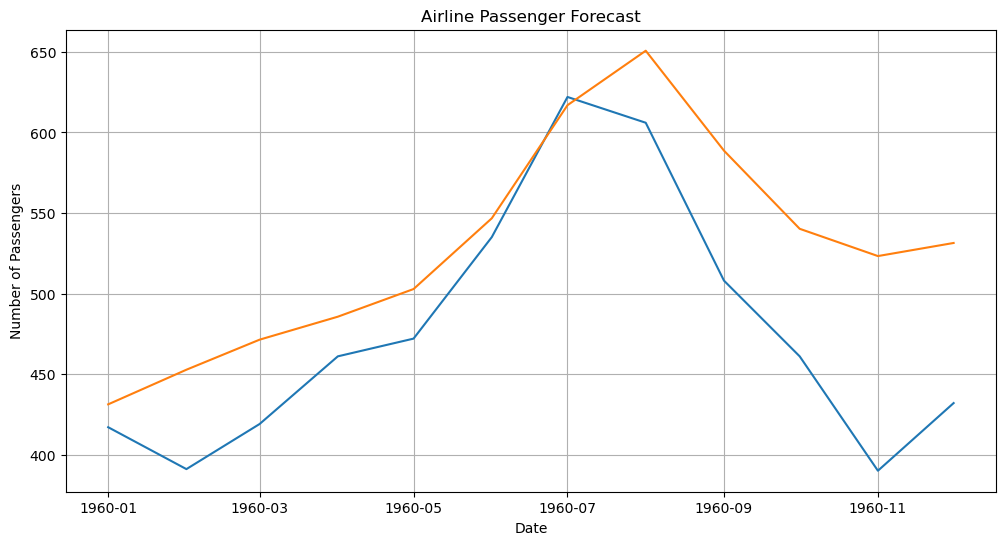

In [54]:
plt.figure(figsize=(12,6))
plt.title("Airline Passenger Forecast")
plt.plot(dates,test_set)
plt.xlabel('Date')
plt.plot(dates,true_predictions)
plt.ylabel('Number of Passengers')
plt.grid(True)

In [28]:
dates

132   1960-01-01
133   1960-02-01
134   1960-03-01
135   1960-04-01
136   1960-05-01
137   1960-06-01
138   1960-07-01
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, dtype: datetime64[ns]

In [54]:
dt = []
for i in range(100000):
    x1 = np.random.randint(1,7)
    x2 = np.random.randint(1,7)
    x3 = np.random.randint(1,7)
    x4 = np.random.randint(1,7)
    dt.append(x1+x2+x3+x4)

In [55]:
dt = np.array(dt)

In [39]:
import warnings
warnings.filterwarnings('ignore')

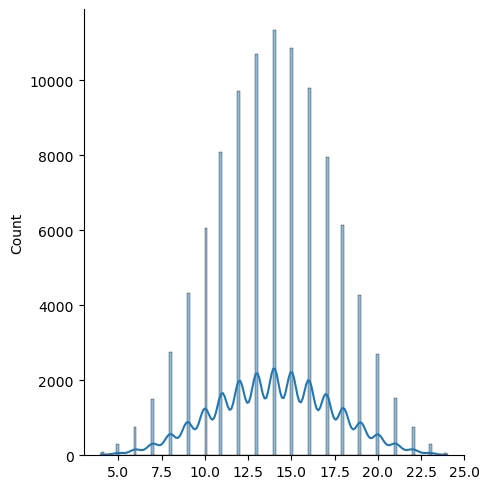

In [57]:
sns.displot(dt,kde=True)